<a href="https://colab.research.google.com/github/PrzemekTeska/175IC-machine-learning/blob/main/Zad_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
np.random.seed(42)


In [29]:
# Import datasetu IRIS i przygotowanie go do modelu
raw_data = load_iris()
all_data=raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

df= pd.DataFrame(np.c_[data,target],columns=feature_names+['target'])

In [30]:
# Użycie dwóch pierwszych kolumn
data = data[:, [0,1]]
target = df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


In [31]:
# Tworzenie lasu

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(data,target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



<function matplotlib.pyplot.show>

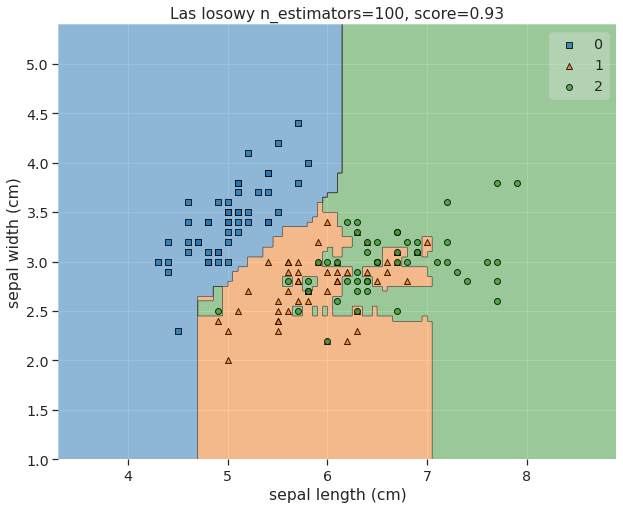

In [32]:
# Wykres
plt.figure(figsize=(10,8))
plot_decision_regions(data,target,classifier)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(f'Las losowy n_estimators=100, score={np.round(classifier.score(data,target),2)}')
plt.show

In [33]:
# Podział danych na treningowe i testowe
X_train, X_test,y_train,y_test = train_test_split(data,target)

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)

y_tree_predict=classifier.predict(X_test)

score = classifier.score(X_test, y_test)
print(score)


0.7894736842105263


In [34]:
# Dokładność z accuracy_score
accuracy = accuracy_score(y_test, y_tree_predict)
print(accuracy)

0.7894736842105263


In [36]:
# Najważniejsza kolumna
importances = classifier.feature_importances_
print(importances)

[0.6588592 0.3411408]
